In [18]:
import numpy as np
import pandas as pd
import math as m
import sympy as sym
import matplotlib.ticker as ticker
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from IPython.display import display, Latex

In [19]:
# Defining fixed angle values
c90, c90e, c90u = [m.pi/2,-m.pi/2], [m.pi/2,m.pi/2], [m.pi/4,m.pi/2]
c45, c45e, c45u = [0,m.pi/4], [m.pi/2,m.pi/4], [m.pi/2,3*m.pi/4]
c15, c30 =  [0,m.pi/12], [0,m.pi/6]
c15u, c30u =  [3*m.pi/4,3*m.pi/4 + m.pi/12], [3*m.pi/4,3*m.pi/4 + m.pi/6]
c7point5, c3point75 =  [0,m.pi/24], [0,m.pi/48]
c7point5u, c3point75u =  [3*m.pi/4,3*m.pi/4+m.pi/24], [3*m.pi/4,3*m.pi/4 + m.pi/48]

In [20]:
def Creating_states( c = [0, m.pi/2] , input_type = 'theta'):    # coeff list like [a0,a1,b0,b1]
    
    if input_type == "coeff":
        if len(c) != 4:
            print("Error! Coefficients given in raw form have to be in form [a0,a1,b0,b1]")
        coeff = c
    
    if input_type == "theta":
        if len(c) != 2:
            print("Error! Coefficients given in theta form have to be angles: [theta_0, delta_theta]")
    
    theta_0 , theta = c[0], c[1]
    coeff = [np.cos(theta_0), np.sin(theta_0), np.cos(theta_0+theta), np.sin(theta_0+theta)] # the first state here is the theta_0 angle 
    coeff = [np.round(i,9) for i in coeff]                                                   ## from |0> axis, the second theta_0 + theta
    
        
    a0, a1, b0, b1 = coeff[0],coeff[1],coeff[2],coeff[3]
    psi0, psi1 = [a0,a1], [b0,b1]      # defining states
    return([psi0,psi1])

# Creating_states(c = [0,m.pi/2])


In [21]:
# Backup code

# def experiment(N = 10000, coeff = [0,m.pi/2], priors = [.5,.5], show_calcs = False, input_type = 'theta'):
#     initial_states = Creating_states( c = coeff, input_type= input_type)     # Creating the two states with these coefficients
#     psi0 , psi1 = initial_states[0], initial_states[1]    # created the states

#     psi0sq, psi1sq = [], []
#     [[psi0sq.append(i*j) for i in psi0] for j in psi0]
#     [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    
#     psi0psi0 = [psi0sq[0], (np.sqrt(2))*psi0sq[1], psi0sq[3]]    
#     psi1psi1 = [psi1sq[0], (np.sqrt(2))*psi1sq[1], psi1sq[3]]    # creating square states

#     vec_psi0psi0, vec_psi1psi1 = np.array(psi0psi0), np.array(psi1psi1)     # np array conversion 
#     rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

#     # defining the measurements along the bloch vector
#     w = m.e**((2/3)*m.pi*(1j))     # the w in the notes
#     POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
#     POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

#     prob_vec_raw =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
#     prob_vec = [round(i.real, 10) for i in prob_vec_raw if abs(i.imag) < .01]          # cleaned up theoretical prob vector

#     POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
#     #prob distribution is simply the corresponding elements of the prob_vec
#     collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

#     nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
#     pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
#     u_0 = [1/3 for i in range(9)]
#     M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
#     r_vec = np.dot(M_inv,pj_num_vec)
    
#     # constructing the rho numrical using the r_vector etc.
#     rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
#     rho_num_raw = np.zeros_like(rho_num_list[0])
#     for matrix in rho_num_list:
#         rho_num_raw = np.add(rho_num_raw, matrix)       # created the numerical rho
    
#     # rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
#     # # Copy values from the original matrix to the top-left 3x3 of the new matrix
#     # rho_num_tilda[:3, :3] = rho_num
#     # # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

#     rho_num = np.real_if_close(np.around(rho_num_raw, decimals=5))
#     # Now doing all this to insert a null row & column on the second index (see notes)
#     rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
#     rho_num_tilda[0,0] = rho_num[0,0]
#     rho_num_tilda[0,2] = rho_num[0,1]
#     rho_num_tilda[0,3] = rho_num[0,2]
#     rho_num_tilda[2,0] = rho_num[1,0]
#     rho_num_tilda[3,0] = rho_num[2,0]
#     rho_num_tilda[2:, 2:] = rho_num[1:,1:]
#     # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

#     R_matrix = (1/np.sqrt(2))*np.array([[np.sqrt(2),0,0,0],[0,1,-1,0],[0,1,1,0],[0,0,0,np.sqrt(2)]])
#     R_matrix_inverse = np.linalg.inv(R_matrix) 

#     sigma_x = np.array([[0, 1], [1, 0]])    # warning- these are in the computational basis of qubits
#     sigma_y = np.array([[0, -1j], [1j, 0]])
#     sigma_z = np.array([[1, 0], [0, -1]])
#     identity_2 = np.identity(2)
#     identity_3 = np.identity(3)
#     identity_4 = np.identity(4)

#     sigma_x_tilda_comp = np.kron(sigma_x , identity_2)
#     sigma_y_tilda_comp = np.kron(sigma_y , identity_2)
#     sigma_z_tilda_comp = np.kron(sigma_z , identity_2)
#     sigma_x_tilda_2_comp = np.kron(identity_2, sigma_x)
#     sigma_y_tilda_2_comp = np.kron(identity_2, sigma_y)
#     sigma_z_tilda_2_comp = np.kron(identity_2, sigma_z)

#     sigma_x_tilda = np.dot(np.dot(R_matrix ,sigma_x_tilda_comp), R_matrix_inverse)
#     sigma_y_tilda = np.dot(np.dot(R_matrix ,sigma_y_tilda_comp), R_matrix_inverse)
#     sigma_z_tilda = np.dot(np.dot(R_matrix ,sigma_z_tilda_comp), R_matrix_inverse)
#     sigma_x_tilda_2 = np.dot(np.dot(R_matrix ,sigma_x_tilda_2_comp), R_matrix_inverse)
#     sigma_y_tilda_2 = np.dot(np.dot(R_matrix ,sigma_y_tilda_2_comp), R_matrix_inverse)
#     sigma_z_tilda_2 = np.dot(np.dot(R_matrix ,sigma_z_tilda_2_comp), R_matrix_inverse)

#     #testing begin
#     rho1 = np.outer(np.array([1,0,0,0]), np.array([1,0,0,0]))
#     r_x = np.trace(np.dot(sigma_x_tilda, rho1))
#     r_y = np.trace(np.dot(sigma_y_tilda, rho1))
#     r_z = np.trace(np.dot(sigma_z_tilda, rho1))        
#     # testing end

#     s_x = np.trace(np.dot(sigma_x_tilda, rho_num_tilda))
#     s_y = np.trace(np.dot(sigma_y_tilda, rho_num_tilda))
#     s_z = np.trace(np.dot(sigma_z_tilda, rho_num_tilda))        
#     s_vector = np.array([s_x, s_y, s_z])                    # s vector
#     s_square = (np.linalg.norm(s_vector))**2

#     # C matrix elts are expectation vlaues of \sigma_j tensored with \sigma_k , then rotate it to the current basis and take expectation wrt rho num
#     # to avoid mess, first creating rotated dyad operators
#     Op_C_xx = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_x)), R_matrix_inverse)
#     Op_C_xy = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_y)), R_matrix_inverse)
#     Op_C_xz = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_z)), R_matrix_inverse)
#     Op_C_yx = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_x)), R_matrix_inverse)
#     Op_C_yy = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_y)), R_matrix_inverse)
#     Op_C_yz = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_z)), R_matrix_inverse)
#     Op_C_zx = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_x)), R_matrix_inverse)
#     Op_C_zy = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_y)), R_matrix_inverse)
#     Op_C_zz = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_z)), R_matrix_inverse)
    
#     # Now finding the expecatations to get the C matrix elts
#     C_xx, C_xy, C_xz = np.trace(np.dot(Op_C_xx ,rho_num_tilda)), np.trace(np.dot(Op_C_xy ,rho_num_tilda)), np.trace(np.dot(Op_C_xz ,rho_num_tilda))
#     C_yx, C_yy, C_yz = np.trace(np.dot(Op_C_yx ,rho_num_tilda)), np.trace(np.dot(Op_C_yy ,rho_num_tilda)), np.trace(np.dot(Op_C_yz ,rho_num_tilda))
#     C_zx, C_zy, C_zz = np.trace(np.dot(Op_C_zx ,rho_num_tilda)), np.trace(np.dot(Op_C_zy ,rho_num_tilda)), np.trace(np.dot(Op_C_zz ,rho_num_tilda))     
#     C_matrix = np.array([[C_xx, C_xy, C_xz],[C_yx, C_yy, C_yz],[C_zx, C_zy, C_zz]])

#     s_prime_vector = (1/(1-s_square))*(np.dot((identity_3-C_matrix),s_vector))
#     s_prime_square = (np.linalg.norm(s_prime_vector))**2
#     X = (1-s_square)/(1-s_prime_square)
#     p_0, p_1 = (1/2)  + (1/2)*(np.sqrt(1-X)), 1/2 - (1/2)*(np.sqrt(1-X))

#     if show_calcs == True: 
#         print('Rho_num_tilda = \n', rho_num_tilda)
        
#         print('\n s_vector = \n', s_vector )
#         print('\n C_matrix = \n', C_matrix )
#         print('\n s_prime_vector = \n', s_prime_vector )
#         print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
#         print('\n X =', X )
#         print('\n p0, p1 =', p_0, p_1)
        

#     if abs(p_0-p_1) > .02:
#         print('\nmethod #1')
#         a = np.subtract(s_vector, 2*p_1*s_prime_vector)/(p_0-p_1)
#         b = np.subtract(2*p_0*s_prime_vector, s_vector)/(p_0-p_1)
#         # print('\n a vector = \n', a )
#         # print('\n b vector = \n', b )
#         eigenvalues, evecs, evals = "dummy string", "dummy string", "dummy string"
#     else:
#         print('\nmethod #2')
#         # if np.linalg.norm(np.subtract(s_vector,s_prime_vector)) > .02:
#         #     print("something wrong, s and s' vectors should be equal")
        
#         eigenvalues, eigenvectors = np.linalg.eig(C_matrix)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
#         # eigenvectors[:,0]   # for example - eigenvector correspoding to the first eigenvalue
#         evals = np.array([i.real for i in eigenvalues if abs(i.imag)< .001])    # cleaning up
#         evecs = np.real_if_close(np.around(eigenvectors, decimals=6))

#         degenerate_eval_indices = []
#         for i in range(len(evals)):
#             if abs(evals[i]) < .17:  #(can make it dynamic threshold by simply using 4/sqrt(N) instead)
#                 degenerate_eval_indices.append(i)

#         evec_comb_1  = evecs[:,degenerate_eval_indices[0]]     # the COMBINATIONS (a+b) and (a-b)
#         evec_comb_2  = evecs[:,degenerate_eval_indices[1]]     

#         a = (evec_comb_1+ evec_comb_2)/2
#         b = (evec_comb_1- evec_comb_2)/2

#         if np.dot(a,b) > .04:       # again, can use dynamic threshold here
#             print("Error somewhere! The bloch vectors aren't orthogonal")

#     rho_1_num = (1/2)*(identity_2 + a[0]*sigma_x + a[1]*sigma_y + a[2]*sigma_z)   # bloch vector def.
#     rho_2_num = (1/2)*(identity_2 + b[0]*sigma_x + b[1]*sigma_y + b[2]*sigma_z)

#     if abs(np.imag(rho_1_num[0,1])) < .01:
#         psi_1_num = [np.sqrt(rho_1_num[0,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
#     else:
#         psi_1_num = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation

#     if abs(np.imag(rho_2_num[0,1])) < .01:
#         psi_2_num = [np.sqrt(rho_2_num[0,0]), np.sqrt(rho_2_num[1,1])] # see research notebook for derivation
#     else:
#         psi_2_num = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])] # see research notebook for derivation

#     # psi_1_num = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
#     # psi_2_num = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])]

#     fid_1 = (np.abs(psi_1_num[0]*psi0[0] + psi_1_num[1]*psi0[1]))**2
#     fid_2 = (np.abs(psi_2_num[0]*psi1[0] + psi_2_num[1]*psi1[1]))**2

#     if show_calcs == True:
#         # Display states in LateX
#         # latex_psi0 = r'\Psi_0 = {}|0\rangle + {}|1\rangle'.format(psi0[0],psi0[1])
#         # latex_psi1 = r'\Psi_1 = {}|0\rangle + {}|1\rangle'.format(psi1[0],psi1[1])
#         # display(Latex(f'${latex_psi0}$'))
#         # display(Latex(f'${latex_psi1}$'))

#         if 0 ==0:
#             ghghghgh = 5
#             # print(" Psi_0Psi_0 ", psi0psi0 )
#             # print(" Psi_1Psi_1 ", psi1psi1 )
#             # print(" Vec_Psi_0Psi_0 ", vec_psi0psi0)
#             # print(" Vec_Psi_1Psi_1 ", vec_psi1psi1)

#             # print('\n Rho_Theorectical = \n', rho)
#             # print('\n Rho_Numerical = \n', rho_num )
#             # print('\n Rho_Numerical_tilda = \n', rho_num_tilda )
            
#             # print('\n R_matrix = \n', R_matrix )
#             # print('\n R_matrix_inverse = \n', R_matrix_inverse)

#             # print('\n sigma_x_tilda_comp= \n', sigma_x_tilda_comp)
#             # print('\n sigma_x_tilda = \n', sigma_x_tilda )
#             # print('\n sigma_x_tilda_2_comp= \n', sigma_x_tilda_2_comp)
#             # print('\n sigma_x_tilda_2 = \n', sigma_x_tilda_2)
#             # print('\n sigma_y_tilda_comp = \n', sigma_y_tilda_comp)
#             # print('\n sigma_y_tilda = \n', sigma_y_tilda )
#             # print('\n sigma_y_tilda_2 = \n', sigma_y_tilda_2)
#             # print('\n sigma_z_tilda_comp = \n', sigma_y_tilda_comp)
#             # print('\n sigma_z_tilda = \n', sigma_z_tilda )
#             # print('\n sigma_z_tilda_2 = \n', sigma_z_tilda_2)

#         # print('\n s_vector = \n', s_vector )
#         # print('\n C_matrix = \n', C_matrix )
#         # print('\n s_prime_vector = \n', s_prime_vector )
#         # print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
#         # print('\n X =', X )
#         # print('\n p0, p1 =', p_0, p_1)
        
#         # print('\n evals_raw= \n ', eigenvalues)
#         # print('\n polished evals= \n ', evals)
#         # print('\n evecs= \n ', evecs)
        
#         print(" \n bloch vector for rho 1" , [r_x, r_y, r_z])

#         print('\n Rho_1_num \n', rho_1_num )
#         print('\n Rho_2_num \n', rho_2_num)
#         print('\n a vector:  ', a)
#         print(   'b vector:  ', b)
#         print('\n psi_1_num:  ', psi_1_num )
#         print(   'psi_2_num:  ', psi_2_num )
#         print('\n psi_1_theoretical:  ', psi0 )
#         print(   'psi_2_theoretical:  ', psi1 )
#         print('fidelities', [fid_1,fid_2])

#     # return ['e', rho, rho_num, evals, evecs, [fid_1, fid_2]]


In [22]:
#Experiment function for the sake of ease, for the error in the density matrices. This plots 
def experiment(N = 10000, coeff = [0,m.pi/2], priors = [.5,.5], show_calcs = False, input_type = 'theta'):
    initial_states = Creating_states( c = coeff, input_type= input_type)     # Creating the two states with these coefficients
    psi0 , psi1 = initial_states[0], initial_states[1]    # created the states
    
    psi0sq, psi1sq = [], []
    [[psi0sq.append(i*j) for i in psi0] for j in psi0]
    [[psi1sq.append(i*j) for i in psi1] for j in psi1]   
    
    psi0psi0 = [psi0sq[0], (np.sqrt(2))*psi0sq[1], psi0sq[3]]    
    psi1psi1 = [psi1sq[0], (np.sqrt(2))*psi1sq[1], psi1sq[3]]    # creating square states

    vec_psi0psi0, vec_psi1psi1 = np.array(psi0psi0), np.array(psi1psi1)     # np array conversion 
    rho = priors[0]*np.outer(vec_psi0psi0, vec_psi0psi0)+ priors[1]*np.outer(vec_psi1psi1, vec_psi1psi1)     # theoretical density matrix with priors 1/2 each.

    # defining the measurements along the bloch vector
    w = m.e**((2/3)*m.pi*(1j))     # the w in the notes
    POVM_vec = (1/(2**.5))*(np.array([[0,1,-1],[-1,0,1],[1,-1,0],[0,w,-w**2],[-1,0,w**2],[1,-w,0],[0,w**2,-w],[-1,0,w],[1,-w**2,0]]))  # an array of POVM direction vectors
    POVM_elts = [(1/3)*np.outer(np.conjugate(POVM_vec[i]),POVM_vec[i]) for i in range(len(POVM_vec))]   # a list of POVM matrices

    prob_vec_raw =  [np.trace(np.dot(POVM_elts[i],rho)) for i in range(9)] 
    prob_vec = [round(i.real, 10) for i in prob_vec_raw if abs(i.imag) < .01]          # cleaned up theoretical prob vector

    POVM_dir_symbols = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']      # symbols to indicate collapsed direction
    #prob distribution is simply the corresponding elements of the prob_vec
    collapse_dir_vec = rand.choices(POVM_dir_symbols, weights=prob_vec, k = N)   # choosing collapse directions with weights for N trials

    nj_vec = [collapse_dir_vec.count(f'd{i+1}') for i in range(9)]
    pj_num_vec = [i/N for i in nj_vec]                                  # numerical prob vector     
    
    u_0 = [1/3 for i in range(9)]
    M_inv = 3*np.outer(u_0,u_0) + 12*(np.eye(9) - np.outer(u_0,u_0))        # creating the inverse matrix
    r_vec = np.dot(M_inv,pj_num_vec)
    
    # constructing the rho numrical using the r_vector etc.
    rho_num_list = [r_vec[i]*POVM_elts[i] for i in range(len(POVM_elts))]   # list of matrices, see equation 7 in Hillery notes pair_disc.pdf
    rho_num_raw = np.zeros_like(rho_num_list[0])
    for matrix in rho_num_list:
        rho_num_raw = np.add(rho_num_raw, matrix)       # created the numerical rho
    
    # rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
    # # Copy values from the original matrix to the top-left 3x3 of the new matrix
    # rho_num_tilda[:3, :3] = rho_num
    # # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

    rho_num = np.real_if_close(np.around(rho_num_raw, decimals=5))
    # Now doing all this to insert a null row & column on the second index (see notes)
    rho_num_tilda = np.zeros((4, 4), dtype= rho_num.dtype)
    rho_num_tilda[0,0] = rho_num[0,0]
    rho_num_tilda[0,2] = rho_num[0,1]
    rho_num_tilda[0,3] = rho_num[0,2]
    rho_num_tilda[2,0] = rho_num[1,0]
    rho_num_tilda[3,0] = rho_num[2,0]
    rho_num_tilda[2:, 2:] = rho_num[1:,1:]
    # rho_tilda[4, 4] = 1     # Changing any particular Elements If needed

    R_matrix = (1/np.sqrt(2))*np.array([[np.sqrt(2),0,0,0],[0,1,-1,0],[0,1,1,0],[0,0,0,np.sqrt(2)]])
    R_matrix_inverse = np.linalg.inv(R_matrix) 

    sigma_x = np.array([[0, 1], [1, 0]])    # warning- these are in the computational basis of qubits
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    identity_2 = np.identity(2)
    identity_3 = np.identity(3)
    identity_4 = np.identity(4)

    sigma_x_tilda_comp = np.kron(sigma_x , identity_2)
    sigma_y_tilda_comp = np.kron(sigma_y , identity_2)
    sigma_z_tilda_comp = np.kron(sigma_z , identity_2)
    sigma_x_tilda_2_comp = np.kron(identity_2, sigma_x)
    sigma_y_tilda_2_comp = np.kron(identity_2, sigma_y)
    sigma_z_tilda_2_comp = np.kron(identity_2, sigma_z)

    sigma_x_tilda = np.dot(np.dot(R_matrix ,sigma_x_tilda_comp), R_matrix_inverse)
    sigma_y_tilda = np.dot(np.dot(R_matrix ,sigma_y_tilda_comp), R_matrix_inverse)
    sigma_z_tilda = np.dot(np.dot(R_matrix ,sigma_z_tilda_comp), R_matrix_inverse)
    sigma_x_tilda_2 = np.dot(np.dot(R_matrix ,sigma_x_tilda_2_comp), R_matrix_inverse)
    sigma_y_tilda_2 = np.dot(np.dot(R_matrix ,sigma_y_tilda_2_comp), R_matrix_inverse)
    sigma_z_tilda_2 = np.dot(np.dot(R_matrix ,sigma_z_tilda_2_comp), R_matrix_inverse)

    #testing begin
    rho1 = np.outer(np.array([1,0,0,0]), np.array([1,0,0,0]))
    r_x = np.trace(np.dot(sigma_x_tilda, rho1))
    r_y = np.trace(np.dot(sigma_y_tilda, rho1))
    r_z = np.trace(np.dot(sigma_z_tilda, rho1))        
    # testing end

    s_x = np.trace(np.dot(sigma_x_tilda, rho_num_tilda))
    s_y = np.trace(np.dot(sigma_y_tilda, rho_num_tilda))
    s_z = np.trace(np.dot(sigma_z_tilda, rho_num_tilda))        
    s_vector = np.array([s_x, s_y, s_z])                    # s vector
    s_square = (np.linalg.norm(s_vector))**2

    # C matrix elts are expectation vlaues of \sigma_j tensored with \sigma_k , then rotate it to the current basis and take expectation wrt rho num
    # to avoid mess, first creating rotated dyad operators
    Op_C_xx = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_x)), R_matrix_inverse)
    Op_C_xy = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_y)), R_matrix_inverse)
    Op_C_xz = np.dot(np.dot(R_matrix ,np.kron(sigma_x,sigma_z)), R_matrix_inverse)
    Op_C_yx = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_x)), R_matrix_inverse)
    Op_C_yy = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_y)), R_matrix_inverse)
    Op_C_yz = np.dot(np.dot(R_matrix ,np.kron(sigma_y,sigma_z)), R_matrix_inverse)
    Op_C_zx = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_x)), R_matrix_inverse)
    Op_C_zy = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_y)), R_matrix_inverse)
    Op_C_zz = np.dot(np.dot(R_matrix ,np.kron(sigma_z,sigma_z)), R_matrix_inverse)
    
    # Now finding the expecatations to get the C matrix elts
    C_xx, C_xy, C_xz = np.trace(np.dot(Op_C_xx ,rho_num_tilda)), np.trace(np.dot(Op_C_xy ,rho_num_tilda)), np.trace(np.dot(Op_C_xz ,rho_num_tilda))
    C_yx, C_yy, C_yz = np.trace(np.dot(Op_C_yx ,rho_num_tilda)), np.trace(np.dot(Op_C_yy ,rho_num_tilda)), np.trace(np.dot(Op_C_yz ,rho_num_tilda))
    C_zx, C_zy, C_zz = np.trace(np.dot(Op_C_zx ,rho_num_tilda)), np.trace(np.dot(Op_C_zy ,rho_num_tilda)), np.trace(np.dot(Op_C_zz ,rho_num_tilda))     
    C_matrix = np.array([[C_xx, C_xy, C_xz],[C_yx, C_yy, C_yz],[C_zx, C_zy, C_zz]])

    s_prime_vector = (1/(1-s_square))*(np.dot((identity_3-C_matrix),s_vector))
    s_prime_square = (np.linalg.norm(s_prime_vector))**2

    # if show_calcs == True: 
    #     print('Rho_num_tilda = \n', rho_num_tilda)
        
    #     print('\n s_vector = \n', s_vector )
    #     print('\n C_matrix = \n', C_matrix )
    #     print('\n s_prime_vector = \n', s_prime_vector )
    #     print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
    #     print('\n X =', X )
    #     print('\n p0, p1 =', p_0, p_1)
        
    # if np.linalg.norm(s_vector- s_prime_vector) > -6/(np.sqrt(N)):
    #     if np.linalg.norm(s_vector- s_prime_vector) < 4/(np.sqrt(N)):
    
    
    if (s_square- s_prime_square) > -6/(np.sqrt(N)):
        if abs(s_square- s_prime_square) < 4/(np.sqrt(N)):
            p_0,p_1 = .5,.5
            evals, evecs = np.linalg.eig(C_matrix)  # each COLUMN is the corresponding eigenvector and not the row. eigenvectors[:,0]
            degenerate_eval_indices = []
            for i in range(len(evals)):
                if abs(evals[i]) < 10/(np.sqrt(N)):  #(can make it dynamic threshold by simply using 4/sqrt(N) instead)
                    degenerate_eval_indices.append(i)
            evec_comb_1, evec_comb_2  = evecs[:,degenerate_eval_indices[0]], evecs[:,degenerate_eval_indices[1]]     # the COMBINATIONS (a+b) and (a-b)
            a_unnormal, b_unnormal = (evec_comb_1+ evec_comb_2)/2, (evec_comb_1- evec_comb_2)/2
        else:
            X = (1-s_square)/(1-s_prime_square)
            p_0, p_1 = (1/2)+(1/2)*(np.sqrt(1-X)), 1/2 - (1/2)*(np.sqrt(1-X))
            a_unnormal, b_unnormal = np.subtract(s_vector, 2*p_1*s_prime_vector)/(p_0-p_1), np.subtract(2*p_0*s_prime_vector, s_vector)/(p_0-p_1)
    
    #normalizing Bloch vectors a and b, coz they must be unit vectors.
    mod_a, mod_b = np.sqrt(np.sum([abs(i)**2 for i in a_unnormal])), np.sqrt(np.sum([abs(i)**2 for i in b_unnormal]))
    a, b = [i/mod_a for i in a_unnormal] , [i/mod_b for i in b_unnormal]
    
    
    rho_1_num = (1/2)*(identity_2 + a[0]*sigma_x + a[1]*sigma_y + a[2]*sigma_z)   # using bloch vector def.
    rho_2_num = (1/2)*(identity_2 + b[0]*sigma_x + b[1]*sigma_y + b[2]*sigma_z)

    if abs(np.imag(rho_1_num[0,1])) < .01:
        psi_1_num_unnormalized = [np.sqrt(rho_1_num[0,0]), np.sqrt(rho_1_num[1,1])] # see research notebook for derivation
    else:
        psi_1_num_unnormalized = [np.sqrt(rho_1_num[0,0])*np.sqrt(rho_1_num[0,1]/rho_1_num[1,0]), np.sqrt(rho_1_num[1,1])] 

    if abs(np.imag(rho_2_num[0,1])) < .01:
        psi_2_num_unnormalized = [np.sqrt(rho_2_num[0,0]), np.sqrt(rho_2_num[1,1])] 
    else:
        psi_2_num_unnormalized = [np.sqrt(rho_2_num[0,0])*np.sqrt(rho_2_num[0,1]/rho_2_num[1,0]), np.sqrt(rho_2_num[1,1])] 

    # mod1, mod2 = np.sum([abs(i)**2 for i in psi_1_num_unnormalized]), np.sum([abs(i)**2 for i in psi_2_num_unnormalized])
    mod1, mod2 = np.sqrt(np.sum([abs(i)**2 for i in psi_1_num_unnormalized])), np.sqrt(np.sum([abs(i)**2 for i in psi_2_num_unnormalized]))
    psi_1_num = [i/mod1 for i in psi_1_num_unnormalized]
    psi_2_num = [i/mod2 for i in psi_2_num_unnormalized]

    psi_1_num_test = [i/mod1 for i in psi_1_num_unnormalized]   # Used for testing comment out later
    psi_2_num_test = [i/mod2 for i in psi_2_num_unnormalized]

    # state matching stuff
    f00,f01 = (abs((psi_1_num[0]*psi0[0]+psi_1_num[1]*psi0[1])))**2, (abs((psi_1_num[0]*psi1[0]+psi_1_num[1]*psi1[1])))**2
    f10, f11 = (abs((psi_2_num[0]*psi0[0]+psi_2_num[1]*psi0[1])))**2, (abs((psi_2_num[0]*psi1[0]+psi_2_num[1]*psi1[1])))**2
    if  (f00 + f11) < (f01+ f10):
        c_flip = [psi_1_num[0],psi_1_num[1],psi_2_num[0], psi_2_num[1]]
        psi_1_num, psi_2_num = [c_flip[2],c_flip[3]],[c_flip[0],c_flip[1]]  # switching the states


    fid_1, fid_2 = (np.abs(psi_1_num[0]*psi0[0] + psi_1_num[1]*psi0[1]))**2, (np.abs(psi_2_num[0]*psi1[0] + psi_2_num[1]*psi1[1]))**2

    if show_calcs == True:
        # Display states in LateX
        # latex_psi0 = r'\Psi_0 = {}|0\rangle + {}|1\rangle'.format(psi0[0],psi0[1])
        # latex_psi1 = r'\Psi_1 = {}|0\rangle + {}|1\rangle'.format(psi1[0],psi1[1])
        # display(Latex(f'${latex_psi0}$'))
        # display(Latex(f'${latex_psi1}$'))

        if 0 ==0:
            ghghghgh = 5
            # print(" Psi_0Psi_0 ", psi0psi0 )
            # print(" Psi_1Psi_1 ", psi1psi1 )
            # print(" Vec_Psi_0Psi_0 ", vec_psi0psi0)
            # print(" Vec_Psi_1Psi_1 ", vec_psi1psi1)

            # print('\n Rho_Theorectical = \n', rho)
            # print('\n Rho_Numerical = \n', rho_num )
            # print('\n Rho_Numerical_tilda = \n', rho_num_tilda )
            
            # print('\n R_matrix = \n', R_matrix )
            # print('\n R_matrix_inverse = \n', R_matrix_inverse)

            # print('\n sigma_x_tilda_comp= \n', sigma_x_tilda_comp)
            # print('\n sigma_x_tilda = \n', sigma_x_tilda )
            # print('\n sigma_x_tilda_2_comp= \n', sigma_x_tilda_2_comp)
            # print('\n sigma_x_tilda_2 = \n', sigma_x_tilda_2)
            # print('\n sigma_y_tilda_comp = \n', sigma_y_tilda_comp)
            # print('\n sigma_y_tilda = \n', sigma_y_tilda )
            # print('\n sigma_y_tilda_2 = \n', sigma_y_tilda_2)
            # print('\n sigma_z_tilda_comp = \n', sigma_y_tilda_comp)
            # print('\n sigma_z_tilda = \n', sigma_z_tilda )
            # print('\n sigma_z_tilda_2 = \n', sigma_z_tilda_2)

        # print('\n C_matrix = \n', C_matrix )
        # print('\n s^2 and (s_prime^2) =', s_square ,s_prime_square )
        # print('\n X =', X )
        
        # print('\n polished evals= \n ', evals)
        # print('\n evecs= \n ', evecs)
        
        # print(" \n bloch vector for rho 1" , [r_x, r_y, r_z])
        
        print('\n p0, p1 =', p_0, p_1)
        print('\n s_vector = \n', s_vector )
        print('\n s_prime_vector = \n', s_prime_vector )

        print('\n a_unnormal:  ', a_unnormal)
        print(   'b_unnormal:  ', b_unnormal)
        print('mod_a_unnormal = ', mod_a)
        print('mod_b_unnormal = ', mod_b)
        print('\n a vector:  ', a)
        print(   'b vector:  ', b)
        print('\n mod a:  ', np.sqrt(np.sum([abs(i)**2 for i in a])))
        print(   'mod b:  ', np.sqrt(np.sum([abs(i)**2 for i in b])))
        # print('\n Rho_1_num \n', rho_1_num )
        # print('\n Rho_2_num \n', rho_2_num)
        # print('\n psi_1_num_test:  ', psi_1_num_test )
        # print(   'psi_2_num_test:  ', psi_2_num_test )
        # print('\n psi_1_num:  ', psi_1_num )
        # print(   'psi_2_num:  ', psi_2_num )
        # print('\n mod psi1:  ', [np.sqrt(np.sum([abs(i)**2 for i in psi_1_num]))] )
        # print(   'mod psi1:  ', [np.sqrt(np.sum([abs(i)**2 for i in psi_2_num]))] )
        # print('\n psi_1_theoretical:  ', psi0 )
        # print(   'psi_2_theoretical:  ', psi1 )
        print('fidelities', [fid_1,fid_2])

    # return ['e', rho, rho_num, evals, evecs, [fid_1, fid_2]]
    return [fid_1, fid_2]

In [23]:
#RoughPad
# experiment(400000, [m.pi/6, m.pi/6], priors = [.25,.75], show_calcs=1)
experiment(400000, [0, m.pi/2], priors = [.25,.75], show_calcs=0)
experiment(3000, [0, m.pi/2], priors = [.75,.25], show_calcs=1)
print(3*'\n')
experiment(3000, [m.pi/2, -m.pi/2], priors = [.75,.25], show_calcs=1)


 p0, p1 = 0.7633091708250659 0.23669082917493417

 s_vector = 
 [ 0.04194557+6.50521303e-19j -0.00244659-3.46944695e-18j
  0.526     +0.00000000e+00j]

 s_prime_vector = 
 [ 0.03827703+1.00583505e-18j -0.0081276 -2.26005611e-18j
  0.00332516+1.19083558e-20j]

 a_unnormal:   [0.04524326+3.31126787e-19j 0.00266012-4.55657856e-18j
 0.99583681-1.07045212e-20j]
b_unnormal:   [ 0.03131079+1.68054331e-18j -0.01891533+3.64663349e-20j
 -0.98918649+3.45212327e-20j]
mod_a_unnormal =  0.9968675865742265
mod_b_unnormal =  0.9898626534726505

 a vector:   [(0.045385429206062124+3.321672717619321e-19j), (0.0026684796464026307-4.570896493047326e-18j), (0.9989659864240416-1.0738157538896156e-20j)]
b vector:   [(0.031631447398802755+1.6977540356716876e-18j), (-0.019109040626772815+3.6839792658927e-20j), (-0.9993169147481599+3.4874770339407207e-20j)]

 mod a:   1.0
mod b:   0.9999999999999999
fidelities [0.9994829932120208, 0.9996584573740799]





 p0, p1 = 0.7594700236824665 0.24052997631753342

 s_ve

[0.9994672538933489, 0.994272217982895]

In [24]:
#RoughPad
experiment(5000, [0, m.pi/2], priors = [.75,.25], show_calcs=1)
print(3*'\n')
experiment(5000, [m.pi/2, -m.pi/2], priors = [.75,.25], show_calcs=1)


 p0, p1 = 0.7293311843614763 0.27066881563852374

 s_vector = 
 [-0.00707107+1.73472348e-18j  0.02988233-1.08420217e-18j
  0.4584    +0.00000000e+00j]

 s_prime_vector = 
 [-0.01767474+1.23360447e-18j  0.02359725-1.74915560e-18j
 -0.00449841-7.82849352e-21j]

 a_unnormal:   [0.00544395+2.32617068e-18j 0.03730032-2.99388908e-19j
 1.00473723+9.23960287e-21j]
b_unnormal:   [-0.04079344+1.41038253e-19j  0.00989419-3.19892228e-18j
 -1.01373404-2.48965899e-20j]
mod_a_unnormal =  1.0054441044084672
mod_b_unnormal =  1.0146027331622978

 a vector:   [(0.005414476028663397+2.313575337195366e-18j), (0.0370983490279612-2.977678285916578e-19j), (0.9992969508353033+9.189573866923377e-21j)]
b vector:   [(-0.040206319366868706+1.3900835077676695e-19j), (0.009751787289282271-3.152881594965728e-18j), (-0.9991438107337872-2.453826417597513e-20j)]

 mod a:   1.0
mod b:   1.0
fidelities [0.9996484754176524, 0.9995719053668937]





 p0, p1 = 0.7355784959022444 0.26442150409775556

 s_vector = 
 [ 2.82842

[0.9995021244832172, 0.9993432284359585]

In [25]:
# # Plotting function 

# def Plotting(N = 10000, c = [0,m.pi/2], p = [.5,.5], step = 100, metric = 'f', size = [8,4], k = 10, starting_step = 10, input_type = 'coeff'):        # function to plot error vs trials plot. N,c,p are Number of trials, coefficients and priors
#     if type(k) == int or type(k) == float:
#         k = [k,k]
#     elif len(k) > 2:
#         print("Error: k has to be two numbers")

#     count = N//step
#     N_i = [step*(i) for i in range(1,count+1)]    # only works if N is a multiple of 100
#     sqrtN = [k[0]/((i)**.5) for i in N_i]    # ideal curve, for del rho error
    
#     if k[0] != 0:
#         inv_sqrt_curve0, inv_sqrt_curve1 = [(1-1/(np.sqrt(k[0]*i))) for i in N_i], [(1-1/(np.sqrt(k[1]*i))) for i in N_i]  
    
#     errors_list_0 , errors_list_1, convergance = [], [], '' 
    
#     if metric == 'f':
#         label_0, label_1 = r' Fidelity $| \Psi_0 \rangle $', r' Fidelity $| \Psi_1\rangle$'
#         errors_list_0, errors_list_1 = [experiment(i,coeff= c,priors= p)[0] for i in N_i], [experiment(i,coeff= c,priors= p)[1] for i in N_i]
#         lasts_0, lasts_1 = errors_list_0[len(errors_list_0)*99//100:], errors_list_1[len(errors_list_1)*99//100:]
#         print(errors_list_0, '\n', errors_list_1)

#     # plt.figure(figsize=(size[0],size[1]))
#     # plt.ylabel(r'$|\Delta \rho|$')
#     convergance = 0
    
#     plt.subplot(1,2,1)
#     plt.plot(N_i[starting_step:], errors_list_0[starting_step:], label=label_0)         # skipping plotting the first five entries coz of errors
#     if k[0] != 0:                                                                                  # put k=0 if the ideal curve is not needed
#         plt.plot(N_i[starting_step//2:],inv_sqrt_curve0[starting_step//2:], "--", label=r'$(1-\frac{1}{\sqrt{kN}})$; $k_0 =$ '+f"{k[0]}", color = 'black')    # sqrt N error qualitatively
#     plt.ylabel('Fidelity')
#     # plt.xlabel(f' Trials ')
#     plt.title(r'|$\Psi_0\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(np.cos(c[0]),3), round(np.sin(c[0]),3)))
#     plt.legend()
    
#     plt.subplot(1,2,2)
#     plt.plot(N_i[starting_step:], errors_list_1[starting_step:], label=label_1, color = 'orange')
#     if k != 0:                                                                                  # put k=0 if the ideal curve is not needed
#         plt.plot(N_i[starting_step//2:],inv_sqrt_curve1[starting_step//2:], "--", label=r'$(1-\frac{1}{\sqrt{kN}})$; $k_1 =$ '+f"{k[1]}", color = 'black')    # sqrt N error qualitatively
#     # plt.xlabel(f' Trials ')
#     plt.title(r'|$\Psi_1\rangle = \ {}|0\rangle + {}|1\rangle$ '.format(round(np.cos(c[1]),3), round(np.sin(c[1]),3)))
    
#     convergance=[np.round((sum(lasts_0)/len(lasts_0)),5), np.round((sum(lasts_1)/len(lasts_1)),5)]  # average convergances
#     plt.legend()
    
#     plt.suptitle(r' $|\Psi_0\rangle$ & $|\Psi_1\rangle$, priors = ({}, {}) respecitvely '.format(p[0], p[1]))       # title of the entire plot
#     # plt.title(r'$|\psi_0\rangle ={}|0\rangle+{}|1\rangle $, $|\psi_1\rangle ={}|0\rangle+{}|1\rangle $, $\eta_1={},\,\eta_2={}$'.format(round(c[0],3), round(c[1],3), round(c[2],3), round(c[3],3), p[0], p[1]))
#     plt.figtext(0.5, 0.01, f"Average of the last 1% values = {convergance} respectively", ha='center', va='bottom') # subcaption at the bottom
#     plt.show()


In [26]:
# backup NPlotting
# def NPlotting(N = 10000, c = [0,m.pi/2], p = [.5,.5], step = 100, size = [8,4], k = 10, starting_step = 10, input_type = 'theta'):        # function to plot error vs trials plot. N,c,p are Number of trials, coefficients and priors
#     count = N//step
#     N_i = [step*(i) for i in range(1,count+1)]    # only works if N is a multiple of 100
#     fid = [experiment(i, coeff=c, priors=p, input_type= input_type) for i in N_i]
#     fid0, fid1 = [i[0] for i in fid], [i[1] for i in fid]

#     fig, axs = plt.subplots(1, 2, figsize= size)
#     axs[0].plot(N_i[starting_step:], fid0[starting_step:], color='black', linestyle = '-' ) 
#     axs[1].plot(N_i[starting_step:], fid1[starting_step:], color='blue') 

#     plt.subplots_adjust(wspace=0.2)

#     axs[0].set_xlabel(r'Trials N')
#     axs[0].set_ylabel('Fidelity')
#     axs[1].set_xlabel(r'Trials N')

#     axs[0].legend([r'$|\langle \psi_0|\psi_{0num}\rangle|^2$'])
#     axs[1].legend([r'$|\langle \psi_1|\psi_{1num}\rangle|^2$'])

#     axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
#     axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
#     # axs[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
#     # axs[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
#     # plt.suptitle(r'$|\Psi_0\rangle = (1|0\rangle + 0|1\rangle)$ & $|\Psi_1\rangle = (\frac{{1}}{{\sqrt{{2}}}}|0\rangle + \frac{{1}}{{\sqrt{{2}}}}|1\rangle)$ with priors $\eta_i$ = ({}, {})'.format(p[0],p[1]))
#     plt.suptitle(r'$|\Psi_0\rangle = {}|0\rangle + {} |1\rangle$ & $|\Psi_1\rangle = {}|0\rangle + {} |1\rangle$ with priors $\eta_i$ = ({}, {})'.format(np.round(m.cos(c[0]),2),np.round(m.sin(c[0]),2),np.round(m.cos(c[0]+c[1]), 2),np.round(m.sin(c[0]+c[1]), 2),p[0], p[1]))       
#     plt.show()

In [27]:
def NPlotting(N = 10000, c = [0,m.pi/2], p = [.5,.5], step = 100, size = [8,4], k = 10, starting_step = 10, input_type = 'theta', show_errors = False, show_title = False, colors = ['black','blue'], font = 16 ):        # function to plot error vs trials plot. N,c,p are Number of trials, coefficients and priors
    count = N//step
    N_i = [step*(i) for i in range(1,count+1)]    # only works if N is a multiple of 100
    fid, error_counter, error_values = [], 0, []
    for i in N_i:
        try:
            fidelity_i = experiment(i, coeff=c, priors=p, input_type= input_type)
            fid.append(fidelity_i)
        except UnboundLocalError:
            error_values.append(i)
            error_counter += 1
            continue
    for i in error_values:
        N_i.remove(i)
    if show_errors == True:
        print("Number of UnBOundLocalErrors = ", error_counter)
        print("len N, len fid =", len(N_i), len(fid), '\n')
    fid0, fid1 = [i[0] for i in fid], [i[1] for i in fid]
    fig, axs = plt.subplots(1, 2, figsize= size)
    
    axs[0].plot(N_i[starting_step:], fid0[starting_step:], color=colors[0], linestyle = '-' ) 
    axs[0].plot(N_i[starting_step:], [1.000 for i in N_i[starting_step:]], color='darkgreen', linestyle = '-.' ) 
    axs[1].plot(N_i[starting_step:], fid1[starting_step:], color=colors[1]) 
    axs[1].plot(N_i[starting_step:], [1.000 for i in N_i[starting_step:]], color='darkgreen', linestyle = '-.' ) 

    plt.subplots_adjust(wspace=0.2)

    axs[0].set_xlabel(r'Trials N', fontsize = font)
    axs[0].set_ylabel('Fidelity' , fontsize = font)
    axs[1].set_xlabel(r'Trials N', fontsize = font)

    axs[0].legend([r'$|\langle \psi_0|\psi_{0num}\rangle|^2$'])
    axs[1].legend([r'$|\langle \psi_1|\psi_{1num}\rangle|^2$'])

    axs[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
    axs[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3)) 
    # axs[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
    # axs[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6)) 
    # plt.suptitle(r'$|\Psi_0\rangle = (1|0\rangle + 0|1\rangle)$ & $|\Psi_1\rangle = (\frac{{1}}{{\sqrt{{2}}}}|0\rangle + \frac{{1}}{{\sqrt{{2}}}}|1\rangle)$ with priors $\eta_i$ = ({}, {})'.format(p[0],p[1]))
    if show_title == True:
        plt.suptitle(r'$|\Psi_0\rangle = {}|0\rangle + {} |1\rangle$ & $|\Psi_1\rangle = {}|0\rangle + {} |1\rangle$ with priors $\eta_i$ = ({}, {})'.format(np.round(m.cos(c[0]),2),np.round(m.sin(c[0]),2),np.round(m.cos(c[0]+c[1]), 2),np.round(m.sin(c[0]+c[1]), 2),p[0], p[1]))       
    plt.show()

In [28]:
#RoughPlots
# NPlotting(10000, c= [0,m.pi/2] step= 50, starting_step= 2, p=[.75,.25])
# NPlotting(10000, c= [0,m.pi/2] step= 50, starting_step= 2, p=[.75,.25])
# # NPlotting(800000, c= [0, m.pi/2],p = [.25,.75], step = 1000, starting_step= 5)
# NPlotting(10000, c= [0, m.pi/2],p = [.75,.25], step = 70, starting_step= 2)
# NPlotting(10000, c= [0, m.pi/2],p = [.5,.5], step = 70, starting_step= 2)

# for i in range(5):
#     NPlotting(N=10000, c= [0,m.pi/2], p= [.75,.25], step= 10 , size= [10,5], starting_step= 2, show_errors= 1)

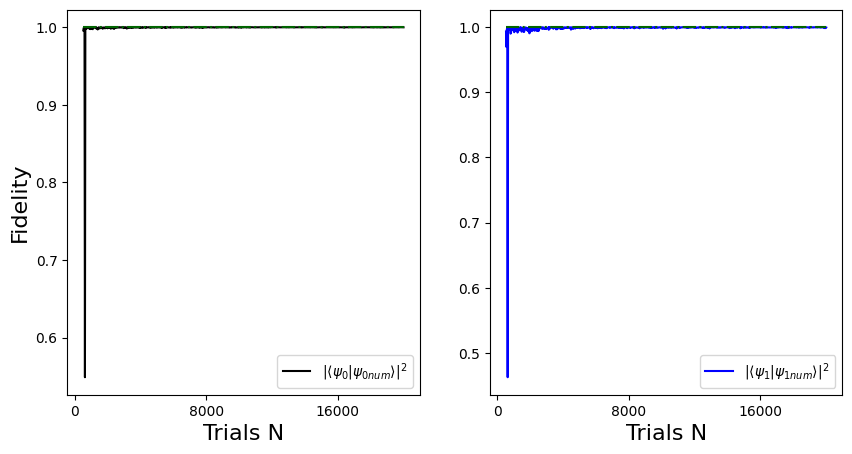

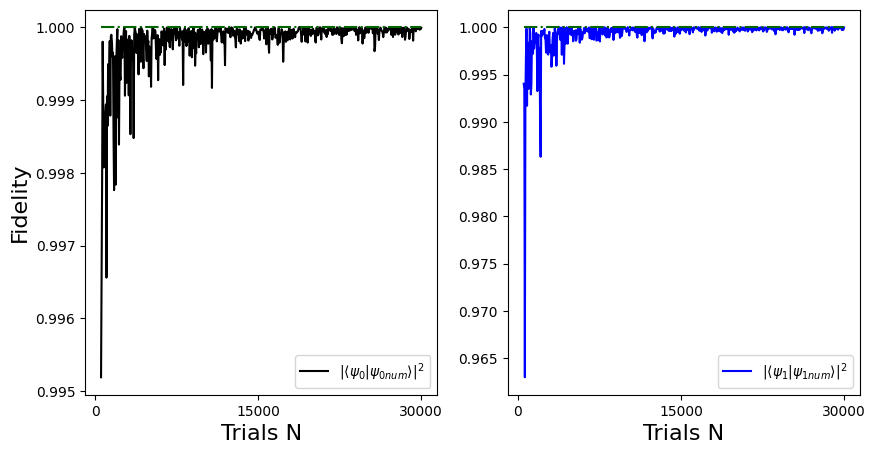

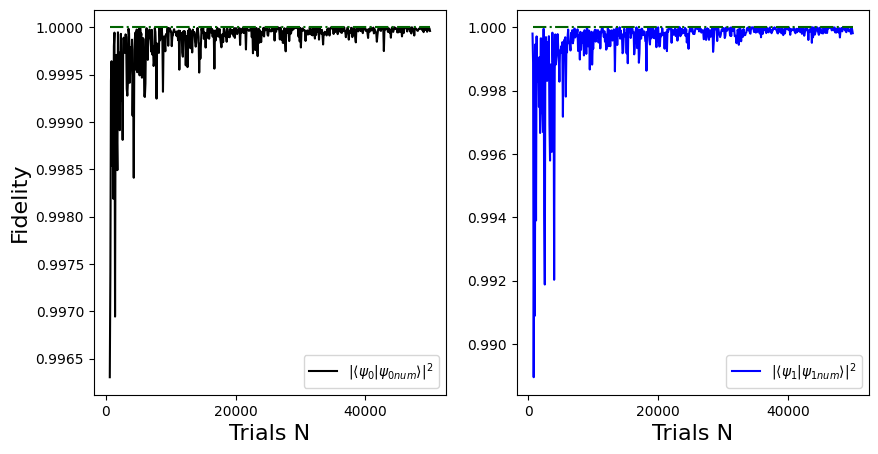

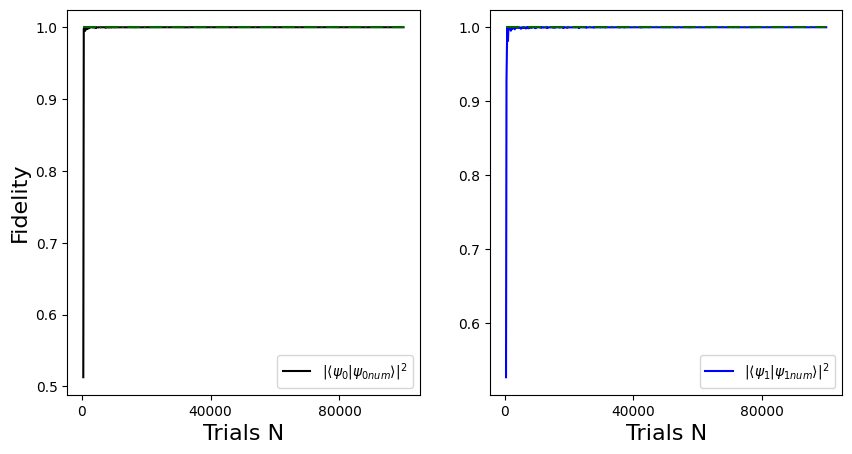

In [29]:
# 90 degrees, unequal probabilities
NPlotting(N=20000,c=[0,m.pi/2],p=[.75,.25],step= 25,size=[10,5],starting_step= 20)
NPlotting(N=30000,c=[0,m.pi/2],p=[.75,.25],step= 50,size=[10,5],starting_step= 10)
NPlotting(N=50000,c=[0,m.pi/2],p=[.75,.25],step= 90,size=[10,5],starting_step= 6)
NPlotting(N=100000,c=[0,m.pi/2],p=[.75,.25],step= 150,size=[10,5],starting_step= 2)

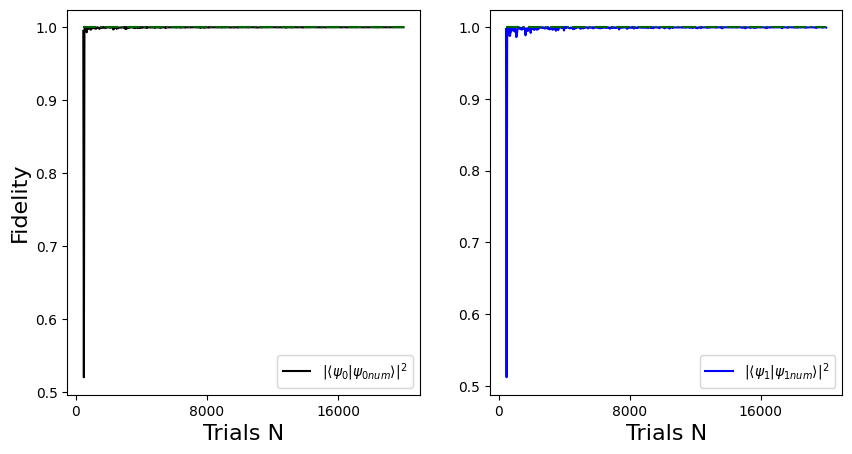

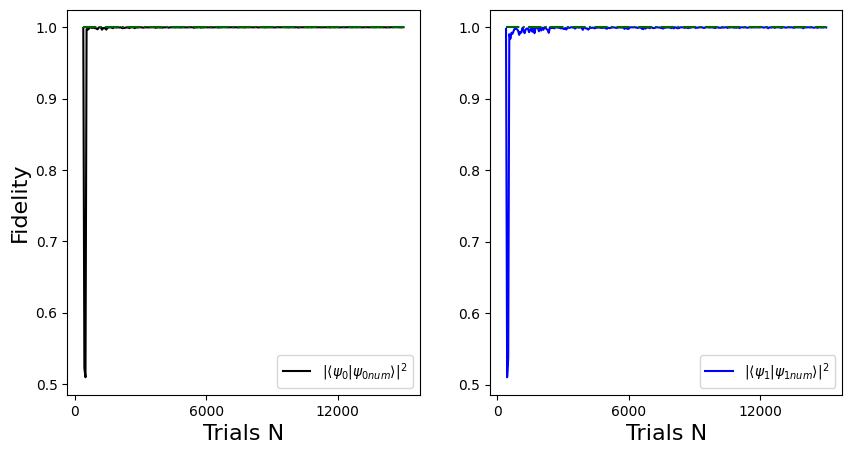

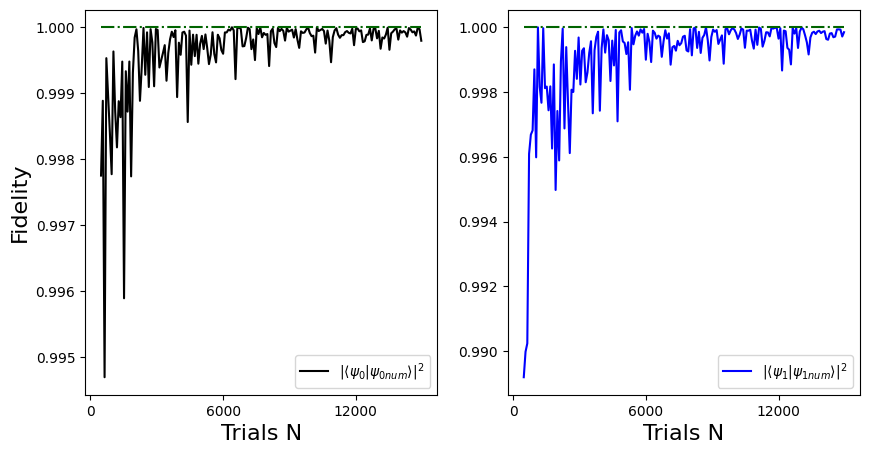

In [30]:
# 90 degrees, unequal probabilities, trial 02
NPlotting(N=20000,c=[0,m.pi/2],p=[.75,.25],step= 35,size=[10,5],starting_step= 12)
NPlotting(N=15000,c=[0,m.pi/2],p=[.75,.25],step= 50,size=[10,5],starting_step= 7)
NPlotting(N=15000,c=[0,m.pi/2],p=[.75,.25],step= 80,size=[10,5],starting_step= 5)

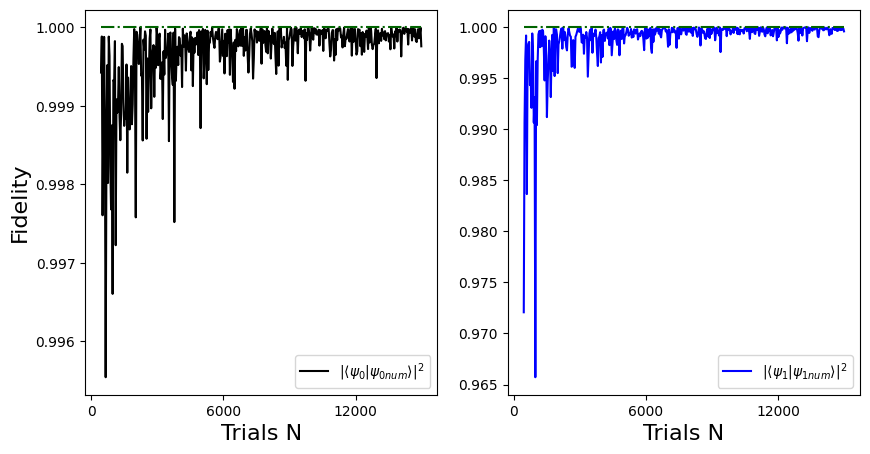

In [40]:
#for submission
# NPlotting(N=15000,c=[0,m.pi/2],p=[.75,.25],step=80,size=[10,5],starting_step= 5, font= 16, show_title= False)
NPlotting(N=15000,c=[0,m.pi/2],p=[.75,.25],step=35,size=[10,5],starting_step= 12, font= 16, show_title= False)